In [1]:
import glob
import matplotlib.pyplot as plt
from matplotlib import cycler
import datetime
import pandas as pd
import os
import helper
import numpy as np
import seaborn as sns
import itertools
import json
import subprocess
from tqdm import tqdm

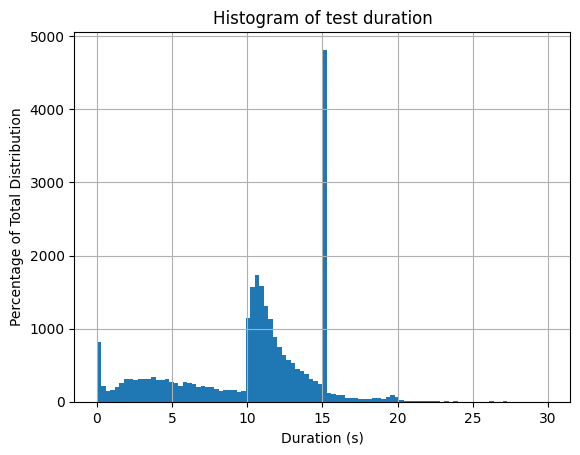

In [2]:
# load raw_tests.csv into a pandas dataframe
df = pd.read_csv('main.csv')

# add a column to the datafram called 'duration' which is the difference between the 'EndTime' and 'StartTime' columns
df['duration'] = pd.to_datetime(df['EndTime']) - pd.to_datetime(df['StartTime'])

# filter out the tests that have duration more than 30s
df = df[df['duration'] < datetime.timedelta(seconds=30)]

# plot a histogram of the duration of the tests
plt.figure()
df['duration'].dt.total_seconds().hist(bins=100)
plt.xlabel('Duration (s)')
plt.ylabel('Percentage of Total Distribution')
plt.title('Histogram of test duration')


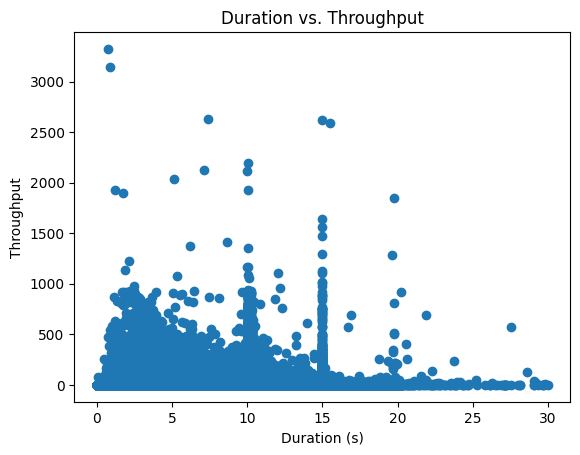

In [3]:
# create a scatterplot of duration vs. throughput result
plt.figure()
plt.scatter(df['duration'].dt.total_seconds(), df['MeanThroughputMbps'])
plt.xlabel('Duration (s)')
plt.ylabel('Throughput')
plt.title('Duration vs. Throughput')

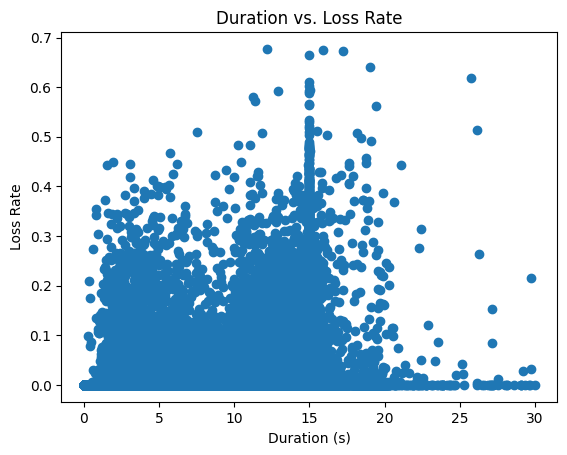

In [4]:
# create a scatterplot of duration vs. LossRate result
plt.figure()
plt.scatter(df['duration'].dt.total_seconds(), df['LossRate'])
plt.xlabel('Duration (s)')
plt.ylabel('Loss Rate')
plt.title('Duration vs. Loss Rate')

In [5]:
# calculate the percentage of tests that are exactly 15 seconds
n_15s = len(df[df['duration'] == datetime.timedelta(seconds=15)])
n_total = len(df)
p_15s = n_15s / n_total
print(f'{p_15s:.5f} of tests are exactly 15 seconds')

# calculate the percentage of tests that are less than 15 seconds
n_less_15s = len(df[df['duration'] < datetime.timedelta(seconds=15)])
p_less_15s = n_less_15s / n_total
print(f'{p_less_15s:.5f} of tests are less than 15 seconds')

# calculate the percentage of tests that are greater than 15 seconds
n_greater_15s = len(df[df['duration'] > datetime.timedelta(seconds=15)])
p_greater_15s = n_greater_15s / n_total
print(f'{p_greater_15s:.5f} of tests are greater than 15 seconds')

# calculate the percentage of tests that are within 0.0001 seconds of 15 seconds
n_15s_plusminus_0_0001s = len(df[(df['duration'] > datetime.timedelta(seconds=14.9999)) & (df['duration'] < datetime.timedelta(seconds=15.0001))])
p_15s_plusminus_0_0001s = n_15s_plusminus_0_0001s / n_total
print(f'{p_15s_plusminus_0_0001s:.5f} of tests are within 0.0001 seconds of 15 seconds')

# calculate the percentage of tests that are within 0.001 seconds of 15 seconds
n_15s_plusminus_0_001s = len(df[(df['duration'] > datetime.timedelta(seconds=14.999)) & (df['duration'] < datetime.timedelta(seconds=15.001))])
p_15s_plusminus_0_001s = n_15s_plusminus_0_001s / n_total
print(f'{p_15s_plusminus_0_001s:.5f} of tests are within 0.001 seconds of 15 seconds')

# calculate the percentage of tests that are within 0.005 seconds of 15 seconds
n_15s_plusminus_0_005s = len(df[(df['duration'] > datetime.timedelta(seconds=14.995)) & (df['duration'] < datetime.timedelta(seconds=15.005))])
p_15s_plusminus_0_005s = n_15s_plusminus_0_005s / n_total
print(f'{p_15s_plusminus_0_005s:.5f} of tests are within 0.005 seconds of 15 seconds')

# calculate the percentage of tests that are within 0.01 seconds of 15 seconds
n_15s_plusminus_0_01s = len(df[(df['duration'] > datetime.timedelta(seconds=14.99)) & (df['duration'] < datetime.timedelta(seconds=15.01))])
p_15s_plusminus_0_01s = n_15s_plusminus_0_01s / n_total
print(f'{p_15s_plusminus_0_01s:.5f} of tests are within 0.01 seconds of 15 seconds')

# calculate the percentage of tests that are within 0.05 seconds of 15 seconds
n_15s_plusminus_0_05s = len(df[(df['duration'] > datetime.timedelta(seconds=14.95)) & (df['duration'] < datetime.timedelta(seconds=15.05))])
p_15s_plusminus_0_05s = n_15s_plusminus_0_05s / n_total
print(f'{p_15s_plusminus_0_05s:.5f} of tests are within 0.05 seconds of 15 seconds')


# calculate the percentage of tests that are within 1 second of 15 seconds
n_15s_plusminus_1s = len(df[(df['duration'] > datetime.timedelta(seconds=14)) & (df['duration'] < datetime.timedelta(seconds=16))])
p_15s_plusminus_1s = n_15s_plusminus_1s / n_total
print(f'{p_15s_plusminus_1s:.5f} of tests are within 1 second of 15 seconds')

# calculate the percentage of tests that are within 2 seconds of 15 seconds
n_15s_plusminus_2s = len(df[(df['duration'] > datetime.timedelta(seconds=13)) & (df['duration'] < datetime.timedelta(seconds=17))])
p_15s_plusminus_2s = n_15s_plusminus_2s / n_total
print(f'{p_15s_plusminus_2s:.5f} of tests are within 2 seconds of 15 seconds')








0.00014 of tests are exactly 15 seconds
0.79403 of tests are less than 15 seconds
0.20583 of tests are greater than 15 seconds
0.02467 of tests are within 0.0001 seconds of 15 seconds
0.15113 of tests are within 0.001 seconds of 15 seconds
0.16499 of tests are within 0.005 seconds of 15 seconds
0.16527 of tests are within 0.01 seconds of 15 seconds
0.16665 of tests are within 0.05 seconds of 15 seconds
0.21320 of tests are within 1 second of 15 seconds
0.27453 of tests are within 2 seconds of 15 seconds


In [6]:
# filter the dataframe to only include tests that are within 0.005 seconds of 15 seconds
df_15s = df[(df['duration'] > datetime.timedelta(seconds=14.995)) & (df['duration'] < datetime.timedelta(seconds=15.005))]
# filter the datafram to only include tests that have `MeanThroughputMbps` greater than 0
df_15s = df_15s[df_15s['MeanThroughputMbps'] > 0]

df_15s.to_csv('df_15s_plusminus_0_005s.csv', index=False)


In [7]:
# get an array of all the `id` values in the dataframe
ids = df_15s['id'].values

# add single quotes around each id value
ids_with_quotes = [f"'{id_}'" for id_ in ids]

# get an array of all the different date values in the dataframe
dates = df_15s['date'].unique()

# add single quotes around each date value
dates_with_quotes = [f"'{date_}'" for date_ in dates]

query = f"SELECT id, parser.ArchiveURL, parser.Filename FROM `measurement-lab.ndt_raw.pcap` WHERE id IN ({', '.join(ids_with_quotes)}) AND date IN ({', '.join(dates_with_quotes)})"
print(query)


SELECT id, parser.ArchiveURL, parser.Filename FROM `measurement-lab.ndt_raw.pcap` WHERE id IN ('ndt-virtual-5tdlv_1700367071_00000000007B1501', 'ndt-virtual-lvhgw_1700360580_00000000004F4533', 'ndt-virtual-lvgz6_1700443683_000000000013ED24', 'ndt-virtual-r7r7p_1700364446_00000000001DB50D', 'ndt-virtual-756w7_1701379167_00000000001B1D29', 'ndt-virtual-zml5g_1699911984_0000000000184A0D', 'ndt-virtual-5tdlv_1700367071_00000000007A72AF', 'ndt-virtual-b9ls9_1700361304_00000000004925C1', 'ndt-virtual-djdnn_1700369999_00000000002AC31B', 'ndt-virtual-lvhgw_1700360580_00000000004F2F6B', 'ndt-virtual-xcvhk_1700355558_000000000030A946', 'ndt-virtual-6rbfk_1700447174_0000000000215996', 'ndt-virtual-h76tn_1700353484_0000000000309D56', 'ndt-virtual-76whk_1700441627_00000000005131DA', 'ndt-virtual-lvhgw_1700360580_00000000004FE292', 'ndt-virtual-djdnn_1700369999_00000000002ABB35', 'ndt-virtual-kswrx_1700452331_000000000028E586', 'ndt-virtual-lvgz6_1700443683_000000000013F6F0', 'ndt-virtual-z5b5s_1701

In [8]:
# get the download_info.csv and convert it to a pandas dataframe
download_info = pd.read_csv('download_info.csv')

# join the download_info dataframe with the df_15s dataframe on the 'id' column
df_15s_download_info = df_15s.join(download_info.set_index('id'), on='id')

# filter out all the rows where the 'ArchiveURL' or 'Filename' column doesn't exist
df_15s_download_info = df_15s_download_info.dropna(subset=['ArchiveURL', 'Filename'])


# save the joined dataframe to a csv file
df_15s_download_info.to_csv('df_15s_download_info.csv', index=False)


In [9]:
# return the number of archive urls that have more than one test
archive_urls = df_15s_download_info['ArchiveURL'].value_counts()
archive_urls = archive_urls[archive_urls > 1]
print(f'{len(archive_urls)} archive urls have more than one test')

# low number share archives, we won't optimize for this case



24 archive urls have more than one test


In [10]:
def process_row(row):
    try:
        # Download the archive
        download_command = f"gsutil cp {row['ArchiveURL']} ."
        subprocess.run(download_command, shell=True, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

        # Get the name of the archive file from the URL
        archive_filename = row['ArchiveURL'].split('/')[-1]

        # Extract the specified file
        extract_command = f"tar -xzvf {archive_filename} {row['Filename']}"
        subprocess.run(extract_command, shell=True, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

        # Move the extracted file to the local 'pcaps' folder
        os.makedirs('pcaps', exist_ok=True)
        move_command = f"mv {row['Filename']} pcaps/"
        subprocess.run(move_command, shell=True, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

        # Delete the downloaded archive
        os.remove(archive_filename)
    except subprocess.CalledProcessError as e:
        print(f"Error processing {row['Filename']}: {e}")

In [14]:
# Add a 'processed' column
df_15s_download_info['processed'] = False

# Group by 'date' and select 100 values for each date
rows_to_process = []
for date, group in df_15s_download_info.groupby('date'):
    rows_to_process.extend(group.head(100).to_dict('records'))

# Process rows with a single progress bar
for row in tqdm(rows_to_process, desc="Processing rows"):
    process_row(row)

# Update the 'processed' column in the original DataFrame
for row in rows_to_process:
    df_15s_download_info.loc[
        (df_15s_download_info['ArchiveURL'] == row['ArchiveURL']) & 
        (df_15s_download_info['Filename'] == row['Filename']), 'processed'] = True

# Create a new DataFrame with just the processed rows
processed_df = df_15s_download_info[df_15s_download_info['processed']]

print(processed_df)


Processing rows: 100%|██████████| 4276/4276 [5:11:46<00:00,  4.37s/it]  


                                                  id        date  ASNumber  \
0              ndt-j4x7k_1700019913_00000000006B29A8  2024-01-06  206067.0   
1              ndt-ppmlg_1699950885_0000000000408352  2024-01-06   13999.0   
2              ndt-h895w_1700214341_00000000004E5C94  2024-01-06  264358.0   
3              ndt-d25hs_1700168392_00000000005B62D1  2024-01-06    5089.0   
4      ndt-virtual-5tdlv_1700367071_00000000007997F6  2024-01-06   42831.0   
...                                              ...         ...       ...   
28287  ndt-virtual-rq9n5_1704938606_0000000000094D28  2024-01-16    4817.0   
28413  ndt-virtual-rq9n5_1704938606_00000000000A2A2F  2024-01-16    4818.0   
28419  ndt-virtual-gch67_1704930156_00000000001A3913  2024-01-16   24186.0   
28448  ndt-virtual-lxf7b_1704937250_000000000005BF32  2024-01-16   51207.0   
28449  ndt-virtual-zssxw_1704948859_00000000000A1E44  2024-01-16   17451.0   

                                                UUID  \
0      

In [15]:
# save the processed_df to a csv file
processed_df.to_csv('processed_df.csv', index=False)

In [17]:
# calculate the percentage of tests that have 'MeanThroughputMbps' equal to 0.00
n_throughput_0 = len(df[df['MeanThroughputMbps'] == 0.00])
p_throughput_0 = n_throughput_0 / n_total
print(f'{p_throughput_0:.5f} of tests have a throughput of 0.00')


0.14138 of tests have a throughput of 0.00
